##### Introduction to Information Theory (Fall 2023/4)

# Home Assignment 3

#### Topics:
- Lossless compression

#### Due: 6/2/2024 before the class

#### Instructions:
- Write your names and date in the cell below.
- Submit a copy of this notebook with code filled in the relevant places as the solution to coding exercises.
- You are welcomed to ask for hints, clarifications, or report issues on **Piazza**.
- For theoretic exercises, you can either write your solution in the notebook using $\LaTeX$ (recommended) or submit additional notes.
- Logarithm is in base $2$ unless stated otherwise.
- For chain of equalities or inequalities, make sure to explain every non-trivial transition.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import factorial, comb

### Markov Chains
(credit to Galen Reeves)

Let $X$ be the state of a deck of card. There are $|\mathcal X| = 52!$ possibilities.
- What is the entropy of $X$ if it is distributed uniformly? call it $H_{\max}$.

**Markov chain of one-at-a-time shuffling**. Let $X_1,X_2,\ldots,X_n$ be a sequence of card shuffles where $X_{n+1}$ is the state of the deck after a card is selected uniformly at random from one of the $52$ locations, and placed on the top.
- What is the stationary distribution of this Markov process?
- Argue that as $n\to \infty$, the deck converges to a perfectly shuffled deck in the sense that the entropy of $H(X_n)$ converge to $H_{\max}$, regardless of the initial state $X_0$.
- What is the entropy rate of the Markov process $X^n$?
- We wish $X_n$ be independent of the initial state and uniformly distributed over all possibilities. This means that $H(X_n|X_0) = H_{\max}$. Show that at least $n = 40$ one-at-a-time shuffle steps are necessary.

*Hint (for the last item):*
Let $N_1,N_2,\ldots$, denote the location of the card that is moved to the top in the $n$-th shuffle. Argue that
$$
H(X_0, X_1, \ldots, X_n) = H(X_0, N_1, N_2,\ldots,N_n) = H(X_0) + n H(N_1),
$$
$$
\begin{align*}
H(X_0, X_1, \ldots, X_n) & = H(X_0) + H(X_1,\ldots,X_n|X_0) \\
& = H(X_0) + H(X_n|X_0) + H(X_1,\ldots,X_{n−1}|X_n, X_0).
\end{align*}
$$
and $H(X_1,\ldots,X_{n−1}|X_n, X_0) \geq 0$.


### Answers:

1. The entropy of X:

${H_{\max}}=-\sum_{i=1}^{52!}\frac{1}{52!}\log(\frac{1}{52!})=-\log\frac{1}{52!}=\log(52!)=\sum_{i=1}^{52}\log_{2}(i)\sim225.58$

2. The transition matrix looks like this: - with $|\mathcal{X}|$ rows and columns.
$$  \left[\begin{array}{cccc}
 & X_{1} & X_{2} &\cdots & X_{52!}\\
X_{1} &\ddots\\
X_{2} &&\ddots\\
\vdots &&&\ddots \\
X_{52!}
\end{array}\right] $$
Each state can only transition to 52 other equally probable legal states, where one card is moved to the top of the deck but otherwise the order stays the same. Thus, each row in the transition matrix has 52 $p>0, p=\frac{1}{52}$ with all other states with $p=0$. Similarly, there are only 52 non-zero $p=\frac{1}{52}$ in each column in the transition matrix, as only 52 state can transition to a particular state, represented by a column.

As the transition matrix's columns sum to 1, $v=\left[\begin{array}{c}
1\\
1\\
\vdots\\
1
\end{array}\right]$ is a eigenvector for the matrix. but as its required to have $\sum_{i}v_{i}=1$ where $v\in\mathbb{R}^{|\mathcal{X}|}$ we can change $v$ to $\left[\begin{array}{c}
\frac{1}{|\mathcal{X}|}\\
\frac{1}{|\mathcal{X}|}\\
\vdots\\
\frac{1}{|\mathcal{X}|}
\end{array}\right]$.

$v^{T}A=\left[\begin{array}{c}
\frac{1}{|\mathcal{X}|}\sum_{i}a_{i,1}\\
\frac{1}{|\mathcal{X}|}\sum_{i}a_{i,2}\\
\vdots\\
\frac{1}{|\mathcal{X}|}\sum_{i}a_{i,\frac{1}{52!}}
\end{array}\right]=\left[\begin{array}{c}
\frac{1}{|\mathcal{X}|}\\
\frac{1}{|\mathcal{X}|}\\
\vdots\\
\frac{1}{|\mathcal{X}|}
\end{array}\right]=v$.

Furthermore, As this Markov chain is ergodic, as explained bellow, there is a unique stationary distribution, thus $v$ is the single solution.

3. This Markov chain is ergodic as it satisfies both terms of irreducibility and Aperiodicity. It is aperiodic as each state has path to itself (By choosing the card on top and placing it back on top). It is irreducible as it is possible to reach every state from a given state, with a positive probability. Thus, if the chain is ergodic, $\mu_{n}  \to \mu$, as $n \to \infty $. Meaning, $H(X_n) \to H(\mu)=H_{max}$.

4.
As this Markov chain is ergodic:

$$H(\mathcal{X})=H(X_{2}|X_{1})=\sum_{s,t}\mu_{s}Q(t|s)\log(Q(t|s))=$$

$$\mu_{s1}H(X_{2}|X_{1}=S_{1})+\mu_{s2}H(X_{2}|X_{1}=S_{2})...+\mu_{s52!}H(X_{2}|X_{1}=S_{52!})\underset{(*)}=$$

$$-\frac{1}{52!}(52!\sum_{i=1}^{52}\frac{1}{52}\log(\frac{1}{52}))=\log(52)$$

$(*)\ \mu=(\frac{1}{52!},\frac{1}{52!},...,\frac{1}{52!})$

5. Using the given hint: $\ H(X_{n}|X_{0})+H(X_{1},\ldots,X_{n-1}|X_{n},X_{0})=nH(N_{1})$ and dividing both sides by $H(N_1)$

$$n=\frac{H(X_{n}|X_{0})}{H(N_{1})}+\frac{H(X_{1},\ldots,X_{n-1}|X_{n},X_{0})}{H(N_{1})}$$

We know that: $\ H(X_{n}|X_{0})=H_{max}= \log(52!)$ <br>
And $\ H(N_{1}) = H(X_{1}|X_{0})= \log(52)$ <br>
$H(X_1,\ldots,X_{n−1}|X_n, X_0) \geq 0$

Thus:

$$n=\frac{\log(52!)}{\log(52)} + \frac{H(X_{1},\ldots,X_{n-1}|X_{n},X_{0})}{\log(52)}= 39.57 + \frac{H(X_{1},\ldots,X_{n-1}|X_{n},X_{0})}{\log(52)}$$

Hence, $n\geq 40$





### Typical Sets
Recall the definition of the $\varepsilon$-typical set of an IID source $X^n$ over the alphabet $\mathcal X$:
$$
A_\varepsilon^{(n)}:= \left\{ x^n \in \mathcal X^n,\,:\, \left|- \frac{1}{n}\sum_{i=1}^n\log(p(x_i)) - H(X) \right| < \varepsilon \right\}
$$
Also define of the *type* of a binary sequence $x^n$ as the number of ones in it.

Suppose that $X \sim \mathrm{Bernuolli}(p)$ with $p=0.7$. Also assume $n=50$
 - Write a program that evaluates, for each of $n+1$ sequence types, the number of sequences with this type, the probability of every sequence with this type, and the total probabilities of all sequences of this type.
 - Report on all sequence types falling in the typical set for $\varepsilon = 0.1$.
 - What is the proportion of the typical set for $\varepsilon = 0.1$ out of all $2^{n}$ sequences? (note: here we count sequences, not sequence types)
 - What is the probability of the typical set for $\varepsilon = 0.1$?
 - Explain how can we encode a sampled of length $n$ from the source above using at most $n(H(X) + \varepsilon)$ bits and an error probability of at most $0.18$?

In [ ]:
entropy = lambda p: -p @ np.log2(p)

def dec_to_bin(x, n):
    return bin(x)[2:].zfill(n)

In [ ]:
p=0.7
n=50
epsilon = 0.1

H = entropy(np.array([1-p,p]))

#### Write a program that evaluates, for each of $n+1$ sequence types, the number of sequences with this type, the probability of every sequence with this type, and the total probabilities of all sequences of this type:

In [ ]:
sequence = np.arange(n+1)
df = pd.DataFrame({"type": sequence})
df['count'] = df['type'].apply(lambda typ: comb(n, typ))
df['P'] = df['type'].apply(lambda k: p**k*(1-p)**(n-k))
df['total_P'] = df['count'] * df['P']
df

,type,count,P,total_P
0,0,1,7.178980e-27,7.178980e-27
1,1,50,1.675095e-26,8.375477e-25
2,2,1225,3.908556e-26,4.787981e-23
3,3,19600,9.119963e-26,1.787513e-21
4,4,230300,2.127991e-25,4.900764e-20
5,5,2118760,4.965313e-25,1.052031e-18
6,6,15890700,1.158573e-24,1.841054e-17
7,7,99884400,2.703337e-24,2.700212e-16
8,8,536878650,6.307787e-24,3.386516e-15
9,9,2505433700,1.471817e-23,3.687540e-14


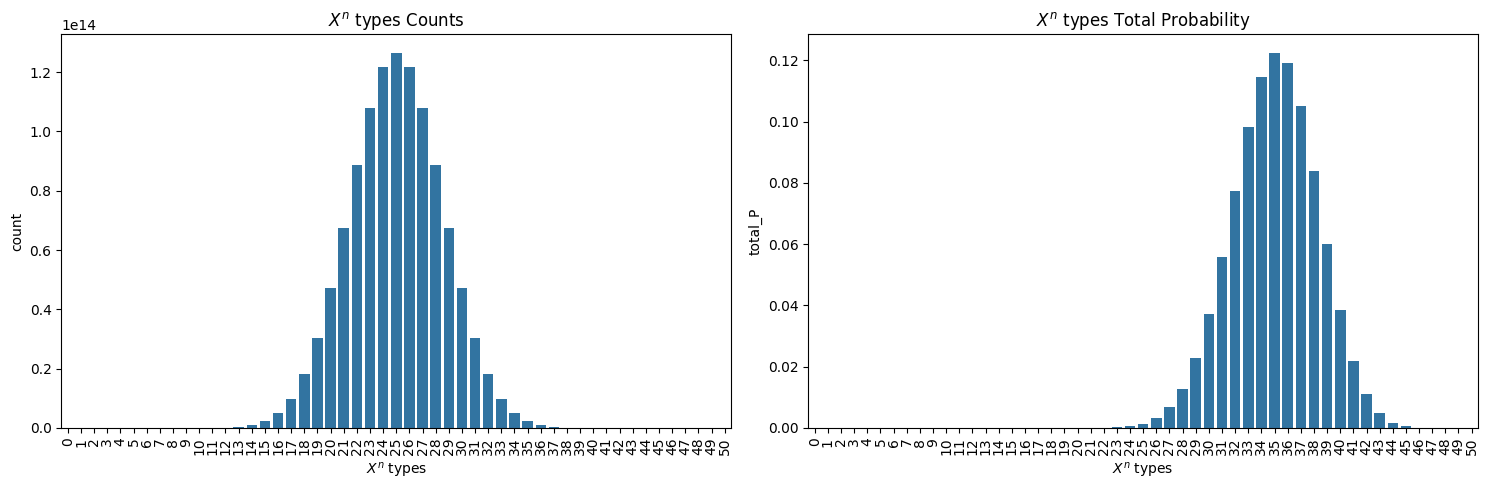

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.barplot(df, x='type', y="count", ax=ax[0])
ax[0].set_title('$X^n$ types Counts')
ax[0].set_xlabel('$X^n$ types')
ax[0].set_xticks(list(ax[0].get_xticks()))
ax[0].set_xticklabels(ax[0].get_xticks(), rotation='vertical')
sns.barplot(df, x='type', y="total_P", ax=ax[1])
ax[1].set_title('$X^n$ types Total Probability')
ax[1].set_xlabel('$X^n$ types')
ax[1].set_xticks(list(ax[1].get_xticks()))
ax[1].set_xticklabels(ax[1].get_xticks(), rotation='vertical')
plt.tight_layout();

#### All sequence types falling in the typical set for $\varepsilon = 0.1$:


In [ ]:
df["typical"] = np.abs((-np.log2(df['P']) / n - H)) < epsilon
df[df.typical]

,type,count,P,total_P,typical
31,31,30405943383200,1.833762e-15,0.055757,True
32,32,18053528883775,4.278779e-15,0.077247,True
33,33,9847379391150,9.983818e-15,0.098314,True
34,34,4923689695575,2.329558e-14,0.114700,True
35,35,2250829575120,5.435634e-14,0.122347,True
36,36,937845656300,1.268315e-13,0.118948,True
37,37,354860518600,2.959401e-13,0.105017,True
38,38,121399651100,6.905269e-13,0.083830,True
39,39,37353738800,1.611229e-12,0.060185,True


#### The proportion of the typical set for $\varepsilon = 0.1$ out of all $2^{n}$ sequences:

In [ ]:
grouped_count = df.groupby('typical')['count'].sum()
grouped_count / grouped_count.sum()

typical
False    0.940552
True     0.059448
Name: count, dtype: float64

#### The probability of the typical set for $\varepsilon = 0.1$:

In [ ]:
grouped_prob = df.groupby('typical')['total_P'].sum()
grouped_prob

typical
False    0.163653
True     0.836347
Name: total_P, dtype: float64

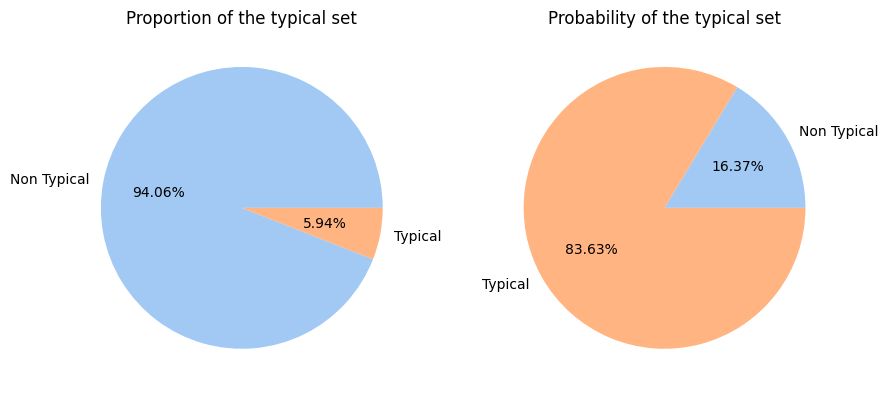

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,8))
colors = sns.color_palette('pastel')[0:5]
ax[0].pie((grouped_count / grouped_count.sum()).values, labels=['Non Typical', "Typical"], autopct='%.2f%%', colors=colors)
ax[0].set_title('Proportion of the typical set')
ax[1].pie(grouped_prob.values, labels=['Non Typical', "Typical"], autopct='%.2f%%',  colors=colors)
ax[1].set_title('Probability of the typical set');

Explain how can we encode a sampled of length $n$ from the source above using at most $n(H(X) + \varepsilon)$ bits and an error probability of at most $0.18$?

Answer:

1. Set $\varepsilon>0$
2. Enumerate all sequences in $A_\varepsilon^{(n)},\space i(X^n)\in\left\{ 1,2,...M\right\} \space$ ,$M\leq2^{n(H(X)+\varepsilon)}$ -- Thus, we can encode $X^n\in A_\varepsilon^{(n)}$ with as most $n(H(X) + \varepsilon)$
3. define the encoder to be:
$f(X^{n})=\begin{cases}
0+i(X^{n}) & X^{n}\in A_{\varepsilon}^{n}\\
1+e & X^{n}\notin A_{\varepsilon}^{n}
\end{cases}$

Meaning:

If the sequence is in the typical set, add 0 to the sequence and encode it according to the position of the sequence in the set (index), with length of $n(H(X) + \varepsilon)$ bits. $\space$ (round up + 1 bit if $n(H(X) + \varepsilon)$ is not integer).

If the sequence is not in the typical set, add 1 and encode as error.

In our specific case: $P_{err}=Pr(f(X^{n})=e)=Pr(X^{n}\notin A_{\varepsilon}^{n})\sim 0.164<0.18=P_{err}$

### Almost lossless compression

In class we proved that:
$$
H(X) = \sup \{ R\,:\, \exists (R,n, \mathrm{P_{err}}) \text{-code with $\mathrm{P_{err}} \to 0$ as $n \to \infty$} \}
$$
Use this result to prove the following:

Let $X^n$ satisfy the AEP property (eg. $X^n \overset{iid}{\sim} P_X$), namely
$$
\lim_{n \to \infty} - \frac{1}{n}\log(p(X^n)) = H(\mathcal X)\quad (\text{in probability})
$$
Let $\delta > 0$. For all $n$ sufficiently large, there exists a code $f : {\mathcal X}^n \to \{0,1\}^*$ (one-to-one) such that
$$
        \mathbb E\left[\frac{1}{n} \mathrm{len}(f(X^n))\right] \leq H(X) + \delta.
$$
(note the difference from class: no errors are allowed, but $f$ is not necessarily a fixed-length code).


$$\mathbb{E}\left[\frac{1}{n}\mathrm{len}(f(X^{n}))\right]\leq H(X)+\delta$$

$$\mathbb{E}\left[\mathrm{len}(f(X^{n}))\right]=\sum_{x^{n}}p(x^{n})\mathrm{len}(f(X^{n}))=$$

$$\sum_{x^{n}\in A_{\varepsilon}^{(n)}}p(x^{n})\mathrm{len}(f(X^{n}))+\sum_{x^{n}\notin A_{\varepsilon}^{(n)}}p(x^{n})\mathrm{len}(f(X^{n}))<$$

$$\sum_{x^{n}\in A_{\varepsilon}^{(n)}}p(x^{n})(n(H(X)+\varepsilon)+1)+\sum_{x^{n}\notin A_{\varepsilon}^{(n)}}p(x^{n})(n+1)=$$

$$Pr(A_{\varepsilon}^{(n)})(n(H(X)+\varepsilon)+1)+(1-Pr(A_{\varepsilon}^{(n)}))(n+1)\leq$$

$$(1-\varepsilon)(n(H(X)+\varepsilon)+1)+\varepsilon(n+1)$$

$$\leq n(H(X)+\varepsilon)+1+\varepsilon( n+1)=nH(X)+n\varepsilon+1+n\varepsilon + \varepsilon\Rightarrow$$

$$\mathbb{E}\left[\frac{1}{n}\mathrm{len}(f(X^{n}))\right]\leq H(X)+2\varepsilon+\frac{1}{n}+\frac{\varepsilon}{n} $$

let $\delta=2\varepsilon+\frac{1+\varepsilon}{n}$ which can be made small by setting the values of $\varepsilon$ and $n$.
